In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [2]:
# importing DataSet
data= pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


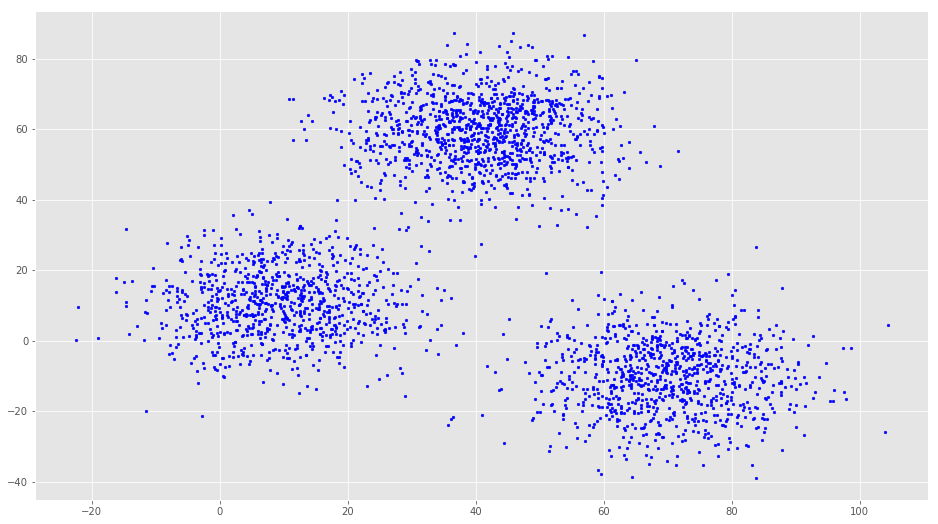

In [3]:
#Getting the values and plotting it

f1=data['V1'].values
f2=data['V2'].values
#print(zip(f1,f2))

plt.scatter(f1,f2,c='blue',s=7)

In [4]:
#Euclidean Distance Calculator

def dist(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [5]:
#Number of clusters
X=np.array(list(zip(f1,f2)))
k=3
# X coordiantes of random centroids

c_x=np.random.randint(0,np.max(X)-20,size=k)

#Y coordinates of random centroids

c_y=np.random.randint(0,np.max(X)-20,size=k)

c= np.array(list(zip(c_x,c_y)),dtype=np.float32)
print(c)

[[ 18.  41.]
 [ 25.  68.]
 [ 48.  10.]]


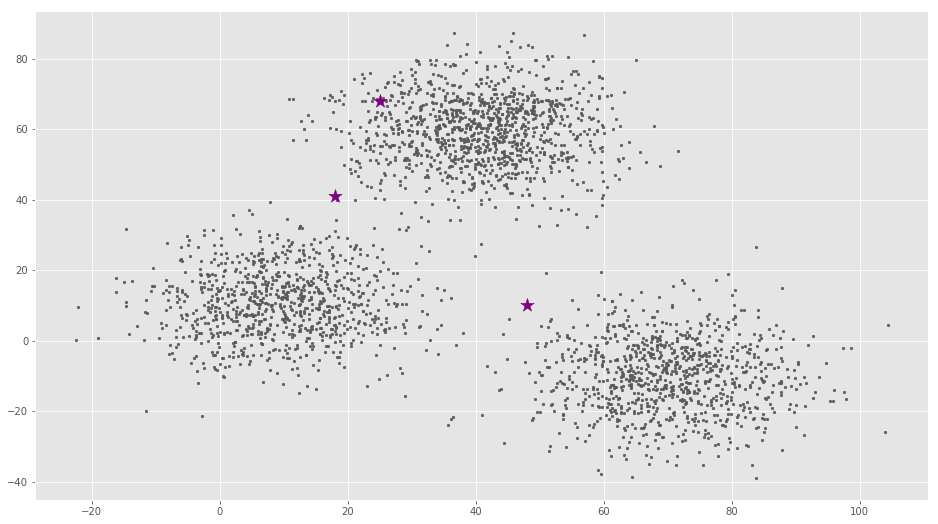

In [6]:
plt.scatter(f1,f2,c='#595959',s=7)
plt.scatter(c_x,c_y,marker='*',s=200,c='purple')

In [7]:
#to store the value of centroids as it updates
c_old=np.zeros(c.shape)
#cluster lables(0,1,2)
clusters=np.zeros(len(X))
#error func. - Distance between new centroids an old centroids
error=dist(c,c_old,None)

#loop will run till the error becomes zero

while error!=0:
    for i in range(len(X)):
        distance=dist(X[i],c)
        cluster=np.argmin(distance)
        clusters[i]=cluster
# Storing the old centroids value    
    c_old=deepcopy(c)
# Finding the new centroids by taking the average value
    for i in range(k):
        points=[X[j] for j in range(len(X)) if clusters[j]==i]
        c[i]=np.mean(points,axis=0)
    error=dist(c,c_old,None)

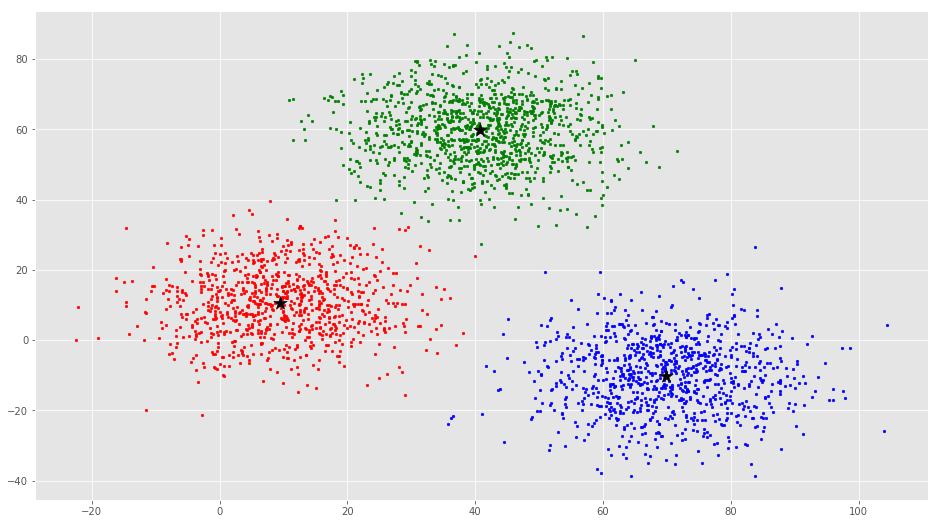

In [8]:
colors=['r','g','b','y','c','m']
fig,ax=plt.subplots()
for i in range(k):
    points=np.array([X[j] for j in range(len(X)) if clusters[j]==i])
    ax.scatter(points[:,0],points[:,1],s=7,c=colors[i])
ax.scatter(c[:,0],c[:,1],marker='*',s=200,c='#050505')

In [11]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans  = KMeans(n_clusters=3)

# fitting the input data 
kmeans  = kmeans.fit(X)
# getting the cluster labels 
labels  = kmeans.predict(X)
# centeroid values 
centeroids = kmeans.cluster_centers_

In [13]:
# comparing with scikit learn centeriods 
print(c) # from scratch
print(centeroids) # from sci-learn

[[  9.47804546  10.68605232]
 [ 40.68362808  59.71589279]
 [ 69.92418671 -10.1196413 ]]
[[ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]
 [ 69.92418447 -10.11964119]]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
plt.rcParams['figure.figsize']=(16,9)

# creating a sample datasets with 4 clusters
X,y = make_blobs(n_samples=800,n_features=3,centers=4)

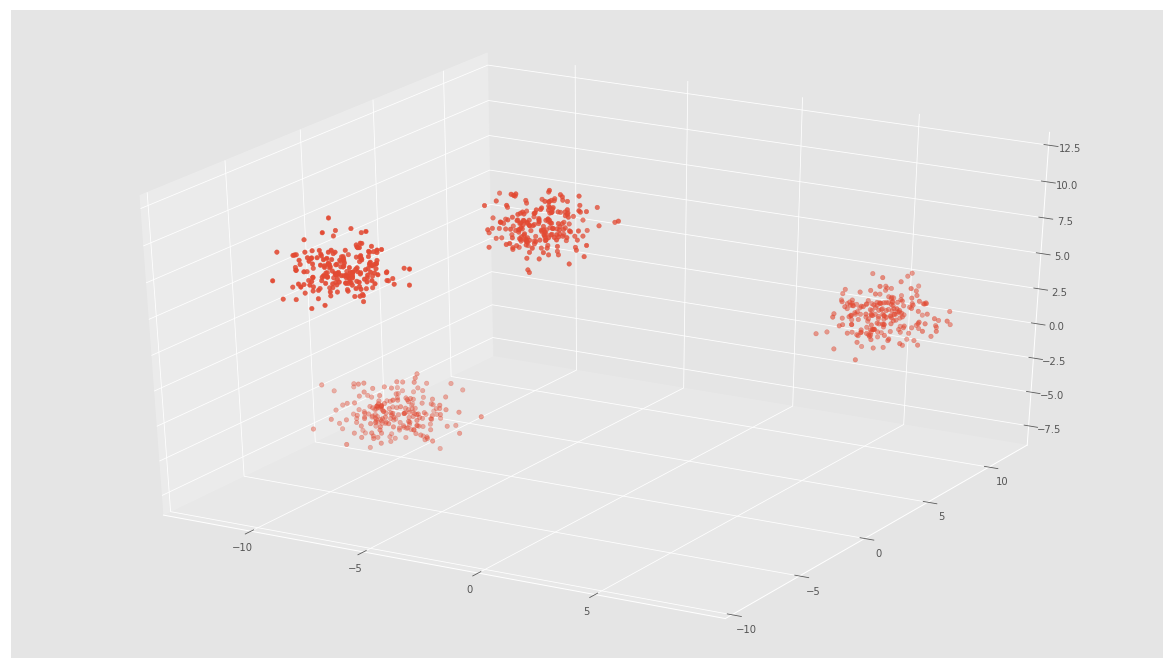

In [15]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2])

In [16]:
# Number of clusters
kmeans  = KMeans(n_clusters=4)

# fitting the input data 
kmeans  = kmeans.fit(X)
# getting the cluster labels 
labels  = kmeans.predict(X)
# centeroid values 
C = kmeans.cluster_centers_

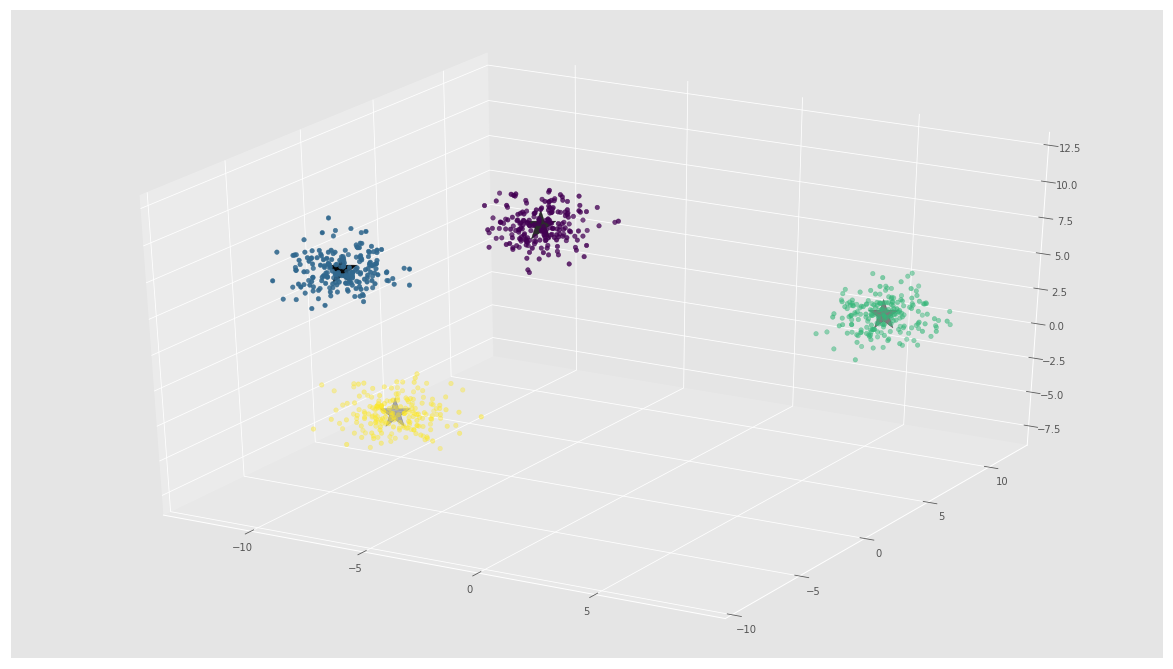

In [22]:
fig  = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2],c=y)
ax.scatter(C[:,0],C[:,1],C[:,2],marker='*',c='#050505',s=1000)
